In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kuntien_avainluvut = pd.read_excel('TestData_Trainee.xlsx', sheet_name='Kuntien avainluvut', skiprows=2)
km_ku = pd.read_excel('TestData_Trainee.xlsx', sheet_name='Km_ku')
kuntien_avainluvut.columns = kuntien_avainluvut.iloc[0]
kuntien_avainluvut = kuntien_avainluvut[1:]
kuntien_avainluvut.reset_index(drop=True, inplace=True)
kuntien_avainluvut = kuntien_avainluvut.drop(kuntien_avainluvut.columns[1], axis=1)
kuntien_avainluvut = kuntien_avainluvut.iloc[:9]

In [4]:
indicator_names = [
    'Degree of urbanisation, %',
    'Population',
    'Share of foreign citizens of the population, %',
    'Share of household-dwelling units living in terraced houses and detached houses, %',
    'Share of household-dwelling units living in rental dwellings, %',
    'Employment rate, %',
    'Proportion of the unemployed among the labour force, %',
    'Workplace self-sufficiency'
]

# Create a new DataFrame with the desired structure
kuntien_avainluvut_new = pd.DataFrame(indicator_names, columns=['Municipality'])
kuntien_avainluvut_new = kuntien_avainluvut_new.join(kuntien_avainluvut)

subset_kuntien_avainluvut = kuntien_avainluvut_new.head(5)

In [5]:
km_ku = pd.read_excel('TestData_Trainee.xlsx', sheet_name='Km_ku', skiprows=3)
km_ku = km_ku.rename(columns={"Unnamed: 0": "Municipality"})
km_ku = km_ku.iloc[:313]
subset_km_ku = km_ku.head(5)

In [6]:
# Transpose the 'kuntien_avainluvut_new' dataset
kuntien_avainluvut_new = kuntien_avainluvut_new.rename(columns={"WHOLE COUNTRY": "Whole country"})
kuntien_avainluvut_new = kuntien_avainluvut_new.set_index('Municipality').transpose()

# Set the index for both datasets
kuntien_avainluvut_new.index.name = 'Municipality'
km_ku = km_ku.set_index('Municipality')

# Merge the datasets
merged_data = kuntien_avainluvut_new.merge(km_ku, left_index=True, right_index=True, how='inner')

# Reset the index
merged_data.reset_index(inplace=True)

# Display the merged dataset
# print(merged_data.head())


In [7]:
print(merged_data.shape)
column_names = merged_data.columns
print(column_names)

(312, 18)
Index(['Municipality', 'Degree of urbanisation, %', 'Population',
       'Share of foreign citizens of the population, %',
       'Share of household-dwelling units living in terraced houses and detached houses, %',
       'Share of household-dwelling units living in rental dwellings, %',
       'Employment rate, %',
       'Proportion of the unemployed among the labour force, %',
       'Workplace self-sufficiency', 'KESK-Proportion of votes cast',
       'PS-Proportion of votes cast', 'KOK-Proportion of votes cast',
       'SDP-Proportion of votes cast', 'VIHR-Proportion of votes cast',
       'VAS-Proportion of votes cast', 'RKP-Proportion of votes cast',
       'KD-Proportion of votes cast', 'Others-Proportion of votes cast'],
      dtype='object')


In [8]:
# Replace "-" values with NaN
merged_data.replace('-', np.nan, inplace=True)

# List of columns to check for all NaN values
columns_to_check = [
    'KESK-Proportion of votes cast',
    'PS-Proportion of votes cast',
    'KOK-Proportion of votes cast',
    'SDP-Proportion of votes cast',
    'VIHR-Proportion of votes cast',
    'VAS-Proportion of votes cast',
    'RKP-Proportion of votes cast',
    'KD-Proportion of votes cast'
]

# Drop rows where all specified columns have NaN values
merged_data = merged_data[~merged_data[columns_to_check].isnull().all(axis=1)]

# Export the merged dataset to an Excel file
merged_data.to_excel("merged_data2.xlsx", index=False)

In [9]:
# Check for null values 
null_values = merged_data.isnull().sum()
print(null_values)

Municipality                                                                           0
Degree of urbanisation, %                                                              0
Population                                                                             0
Share of foreign citizens of the population, %                                         0
Share of household-dwelling units living in terraced houses and detached houses, %     0
Share of household-dwelling units living in rental dwellings, %                        0
Employment rate, %                                                                     0
Proportion of the unemployed among the labour force, %                                 0
Workplace self-sufficiency                                                             0
KESK-Proportion of votes cast                                                          0
PS-Proportion of votes cast                                                            0
KOK-Proportion of vot

In [11]:
# List of indicators that should be converted to float
indicators_to_convert = [
    'Degree of urbanisation, %',
    'Share of foreign citizens of the population, %',
    'Share of household-dwelling units living in terraced houses and detached houses, %',
    'Share of household-dwelling units living in rental dwellings, %',
    'Employment rate, %',
    'Proportion of the unemployed among the labour force, %',
    'Workplace self-sufficiency',
    'KESK-Proportion of votes cast',
    'PS-Proportion of votes cast',
    'KOK-Proportion of votes cast',
    'SDP-Proportion of votes cast',
    'VIHR-Proportion of votes cast',
    'VAS-Proportion of votes cast',
    'RKP-Proportion of votes cast',
    'KD-Proportion of votes cast'
]

selected_indicators = [
    'Degree of urbanisation, %',
    'Population',
    'Share of foreign citizens of the population, %',
    'Share of household-dwelling units living in terraced houses and detached houses, %',
    'Share of household-dwelling units living in rental dwellings, %',
    'Employment rate, %',
    'Proportion of the unemployed among the labour force, %',
    'Workplace self-sufficiency'
]

# Convert the data types of the indicators to float
for indicator in indicators_to_convert:
    merged_data[indicator] = pd.to_numeric(merged_data[indicator], errors='coerce')

# Summary statistics for the entire dataset
summary_entire_dataset = merged_data[selected_indicators].describe()

# Summary statistics for the municipalities with missing 'RKP-Proportion of votes cast' values
missing_rkp = merged_data[merged_data['RKP-Proportion of votes cast'].isnull()]
summary_missing_rkp = missing_rkp[selected_indicators].describe()

print("Summary statistics for the entire dataset:")
print(summary_entire_dataset)

print("\nSummary statistics for the municipalities with missing 'RKP-Proportion of votes cast' values:")
print(summary_missing_rkp)


Summary statistics for the entire dataset:
       Degree of urbanisation, %    Population  \
count                 296.000000  2.960000e+02   
mean                   63.574324  3.715125e+04   
std                    19.449894  3.231617e+05   
min                     0.000000  7.340000e+02   
25%                    48.350000  3.066750e+03   
50%                    61.450000  6.564500e+03   
75%                    78.050000  1.547750e+04   
max                   100.000000  5.513130e+06   

       Share of foreign citizens of the population, %  \
count                                      296.000000   
mean                                         2.242568   
std                                          1.733424   
min                                          0.300000   
25%                                          1.100000   
50%                                          1.800000   
75%                                          2.700000   
max                                         12.700

In [12]:
import numpy as np

# Create bins for the degree of urbanisation
bins = [0, 33, 67, 100]
merged_data['urbanisation_bin'] = pd.cut(merged_data['Degree of urbanisation, %'], bins, include_lowest=True)

# Group the municipalities by urbanisation_bin
grouped_data = merged_data.groupby('urbanisation_bin')

# Calculate the median value for 'RKP-Proportion of votes cast' for each group
medians = grouped_data['RKP-Proportion of votes cast'].median()

# Impute missing values using the median value of each group
merged_data_imputed = merged_data.copy()

for index, row in merged_data_imputed.iterrows():
    if pd.isnull(row['RKP-Proportion of votes cast']):
        urbanisation_bin = row['urbanisation_bin']
        imputed_value = medians.loc[urbanisation_bin]
        merged_data_imputed.at[index, 'RKP-Proportion of votes cast'] = imputed_value

# Check for missing values
print(merged_data_imputed.isnull().sum())


Municipality                                                                          0
Degree of urbanisation, %                                                             0
Population                                                                            0
Share of foreign citizens of the population, %                                        0
Share of household-dwelling units living in terraced houses and detached houses, %    0
Share of household-dwelling units living in rental dwellings, %                       0
Employment rate, %                                                                    0
Proportion of the unemployed among the labour force, %                                0
Workplace self-sufficiency                                                            0
KESK-Proportion of votes cast                                                         0
PS-Proportion of votes cast                                                           0
KOK-Proportion of votes cast    

In [13]:
merged_data_imputed.drop(columns=['urbanisation_bin'], inplace=True)
# Export the merged dataset to an Excel file
merged_data_imputed.to_excel("merged_data3.xlsx", index=False)

In [15]:
summary_statistics = merged_data_imputed.describe()
print(summary_statistics)

       Degree of urbanisation, %    Population  \
count                 296.000000  2.960000e+02   
mean                   63.574324  3.715125e+04   
std                    19.449894  3.231617e+05   
min                     0.000000  7.340000e+02   
25%                    48.350000  3.066750e+03   
50%                    61.450000  6.564500e+03   
75%                    78.050000  1.547750e+04   
max                   100.000000  5.513130e+06   

       Share of foreign citizens of the population, %  \
count                                      296.000000   
mean                                         2.242568   
std                                          1.733424   
min                                          0.300000   
25%                                          1.100000   
50%                                          1.800000   
75%                                          2.700000   
max                                         12.700000   

       Share of household-dwelling 

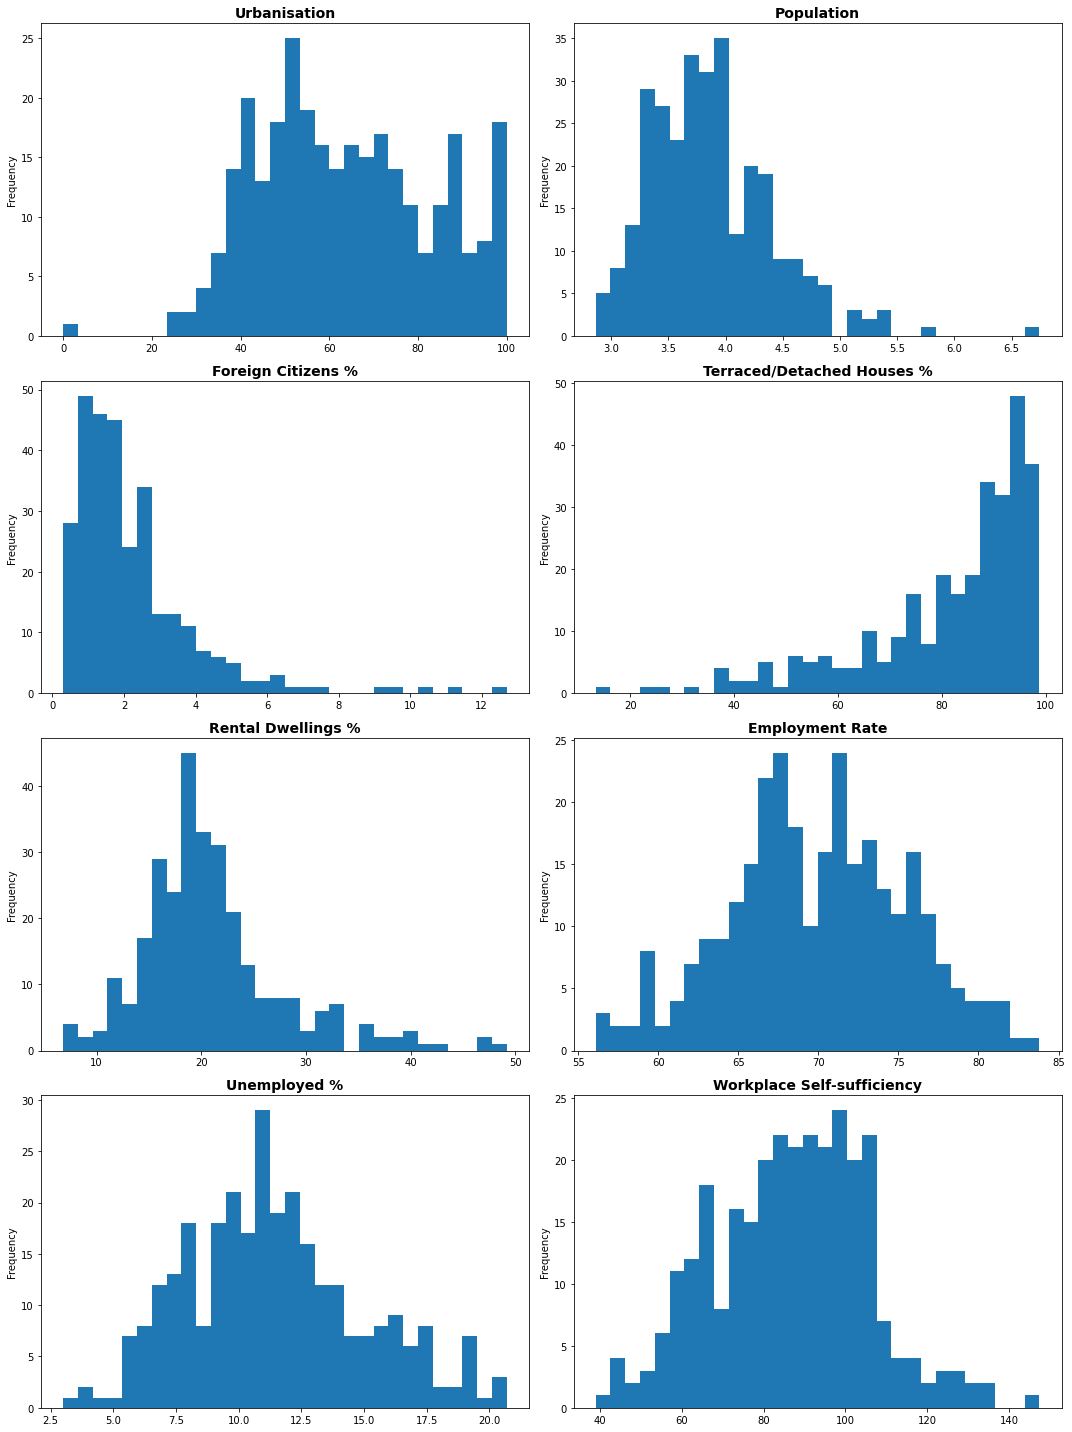

In [47]:
import numpy as np

columns_to_plot = ['Degree of urbanisation, %', 'Population', 'Share of foreign citizens of the population, %', 
                  'Share of household-dwelling units living in terraced houses and detached houses, %',
                  'Share of household-dwelling units living in rental dwellings, %', 'Employment rate, %',
                  'Proportion of the unemployed among the labour force, %', 'Workplace self-sufficiency']

short_names = ['Urbanisation', 'Population', 'Foreign Citizens %',
               'Terraced/Detached Houses %', 'Rental Dwellings %',
               'Employment Rate', 'Unemployed %', 'Workplace Self-sufficiency']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for idx, (column, short_name) in enumerate(zip(columns_to_plot, short_names)):
    ax = axes[idx // 2, idx % 2]
    data_to_plot = merged_data_imputed[column]
    
    if column == 'Population':
        data_to_plot = np.log10(data_to_plot)  # Apply log transformation (base 10)
        ax.set_title(short_name, fontsize=14, fontweight='bold')
    else:
        ax.set_title(short_name, fontsize=14, fontweight='bold')
        
    data_to_plot.plot(kind='hist', ax=ax, bins=30)
    
plt.tight_layout()
plt.savefig('histogram1.png', dpi=600)
plt.show()

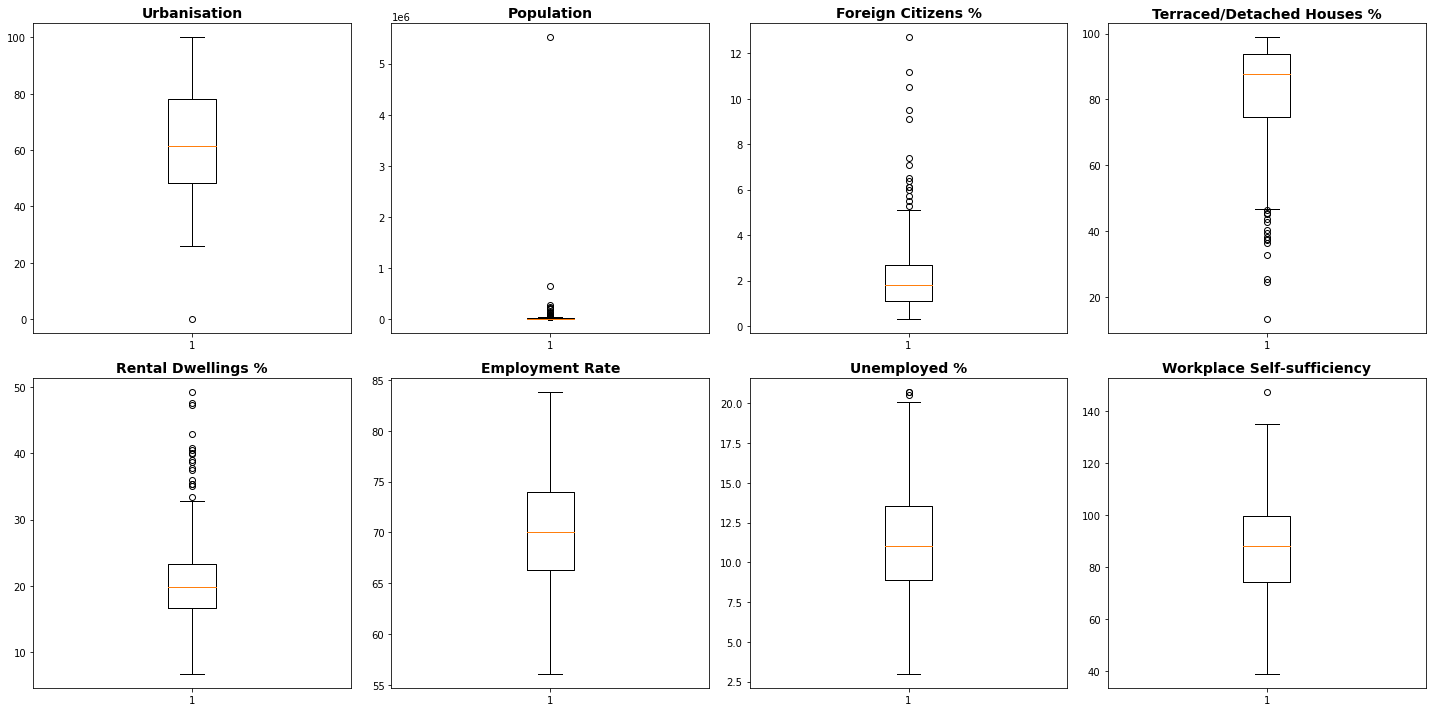

In [49]:
import matplotlib.pyplot as plt

variables = [
    "Degree of urbanisation, %",
    "Population",
    "Share of foreign citizens of the population, %",
    "Share of household-dwelling units living in terraced houses and detached houses, %",
    "Share of household-dwelling units living in rental dwellings, %",
    "Employment rate, %",
    "Proportion of the unemployed among the labour force, %",
    "Workplace self-sufficiency"
]

# List of shorter names for the columns
short_names = ['Urbanisation', 'Population', 'Foreign Citizens %',
               'Terraced/Detached Houses %', 'Rental Dwellings %',
               'Employment Rate', 'Unemployed %', 'Workplace Self-sufficiency']

# Plot box plots for each variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, variable in enumerate(variables):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(merged_data_imputed[variable])
    axes[row, col].set_title(short_names[i], fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('histogram1.png', dpi=400)
plt.show()

In [50]:
# Handling outliers
variable_name = "Share of foreign citizens of the population, %"

# Calculate the quartiles and the interquartile range (IQR)
Q1 = merged_data_imputed[variable_name].quantile(0.25)
Q3 = merged_data_imputed[variable_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = merged_data_imputed[(merged_data_imputed[variable_name] < lower_bound) | (merged_data_imputed[variable_name] > upper_bound)]

# Print the municipality names and the values of the variable for the outliers
print(f"Outliers for {variable_name}:")
for index, row in outliers.iterrows():
    print(f"{row['Municipality']}: {row[variable_name]}")

# 2
variable_name = "Share of household-dwelling units living in terraced houses and detached houses, %"

# Calculate the quartiles and the interquartile range (IQR)
Q1 = merged_data_imputed[variable_name].quantile(0.25)
Q3 = merged_data_imputed[variable_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = merged_data_imputed[(merged_data_imputed[variable_name] < lower_bound) | (merged_data_imputed[variable_name] > upper_bound)]

# Print the municipality names and the values of the variable for the outliers
print(f"Outliers for {variable_name}:")
for index, row in outliers.iterrows():
    print(f"{row['Municipality']}: {row[variable_name]}")
    
# 3
variable_name = "Share of household-dwelling units living in rental dwellings, %"

# Calculate the quartiles and the interquartile range (IQR)
Q1 = merged_data_imputed[variable_name].quantile(0.25)
Q3 = merged_data_imputed[variable_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = merged_data_imputed[(merged_data_imputed[variable_name] < lower_bound) | (merged_data_imputed[variable_name] > upper_bound)]

# Print the municipality names and the values of the variable for the outliers
print(f"Outliers for {variable_name}:")
for index, row in outliers.iterrows():
    print(f"{row['Municipality']}: {row[variable_name]}")
    
# 4
variable_name = "Proportion of the unemployed among the labour force, %"

# Calculate the quartiles and the interquartile range (IQR)
Q1 = merged_data_imputed[variable_name].quantile(0.25)
Q3 = merged_data_imputed[variable_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = merged_data_imputed[(merged_data_imputed[variable_name] < lower_bound) | (merged_data_imputed[variable_name] > upper_bound)]

# Print the municipality names and the values of the variable for the outliers
print(f"Outliers for {variable_name}:")
for index, row in outliers.iterrows():
    print(f"{row['Municipality']}: {row[variable_name]}")
    
    
# 5
variable_name = "Workplace self-sufficiency"

# Calculate the quartiles and the interquartile range (IQR)
Q1 = merged_data_imputed[variable_name].quantile(0.25)
Q3 = merged_data_imputed[variable_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = merged_data_imputed[(merged_data_imputed[variable_name] < lower_bound) | (merged_data_imputed[variable_name] > upper_bound)]

# Print the municipality names and the values of the variable for the outliers
print(f"Outliers for {variable_name}:")
for index, row in outliers.iterrows():
    print(f"{row['Municipality']}: {row[variable_name]}")





Outliers for Share of foreign citizens of the population, %:
Espoo: 10.5
Helsinki: 9.5
Honkajoki: 6.4
Kaskinen: 5.3
Kerava: 7.4
Kirkkonummi: 5.5
Korsnäs: 9.1
Kotka: 6.1
Närpes: 12.7
Jakobstad: 7.1
Turku: 6.5
Nykarleby: 6.1
Vaasa: 6.0
Vantaa: 11.2
Vöyri: 5.7
Outliers for Share of household-dwelling units living in terraced houses and detached houses, %:
Whole country: 39.4
Espoo: 40.5
Forssa: 45.2
Helsinki: 13.3
Jyväskylä: 38.1
Kerava: 37.5
Kotka: 43.8
Kuopio: 42.8
Lahti: 32.7
Lappeenranta: 46.3
Riihimäki: 45.4
Tampere: 24.7
Turku: 25.6
Vaasa: 37.2
Vantaa: 36.3
Outliers for Share of household-dwelling units living in rental dwellings, %:
Espoo: 37.4
Helsinki: 49.2
Joensuu: 40.8
Jyväskylä: 42.9
Kemi: 35.1
Kerava: 35.3
Kotka: 35.3
Kuopio: 38.9
Lahti: 39.9
Lappeenranta: 35.9
Oulu: 40.0
Rovaniemi: 37.7
Seinäjoki: 33.4
Tampere: 47.2
Turku: 47.5
Vaasa: 40.5
Vantaa: 38.7
Outliers for Proportion of the unemployed among the labour force, %:
Ilomantsi: 20.7
Lieksa: 20.5
Salla: 20.7
Outliers for W

In [52]:
parties = ['KESK', 'PS', 'KOK', 'SDP', 'VIHR', 'VAS', 'RKP', 'KD', 'Others']
votes_proportion = merged_data_imputed[[f'{party}-Proportion of votes cast' for party in parties]]
summary_statistics = votes_proportion.describe()
print(summary_statistics)

       KESK-Proportion of votes cast  PS-Proportion of votes cast  \
count                     296.000000                   296.000000   
mean                       26.573649                    19.465541   
std                        14.487792                     5.648671   
min                         0.400000                     1.100000   
25%                        14.475000                    16.900000   
50%                        27.900000                    19.600000   
75%                        37.700000                    22.400000   
max                        66.100000                    42.700000   

       KOK-Proportion of votes cast  SDP-Proportion of votes cast  \
count                    296.000000                    296.000000   
mean                      11.571959                     15.962500   
std                        6.508179                      7.109357   
min                        0.400000                      2.200000   
25%                        6.3000

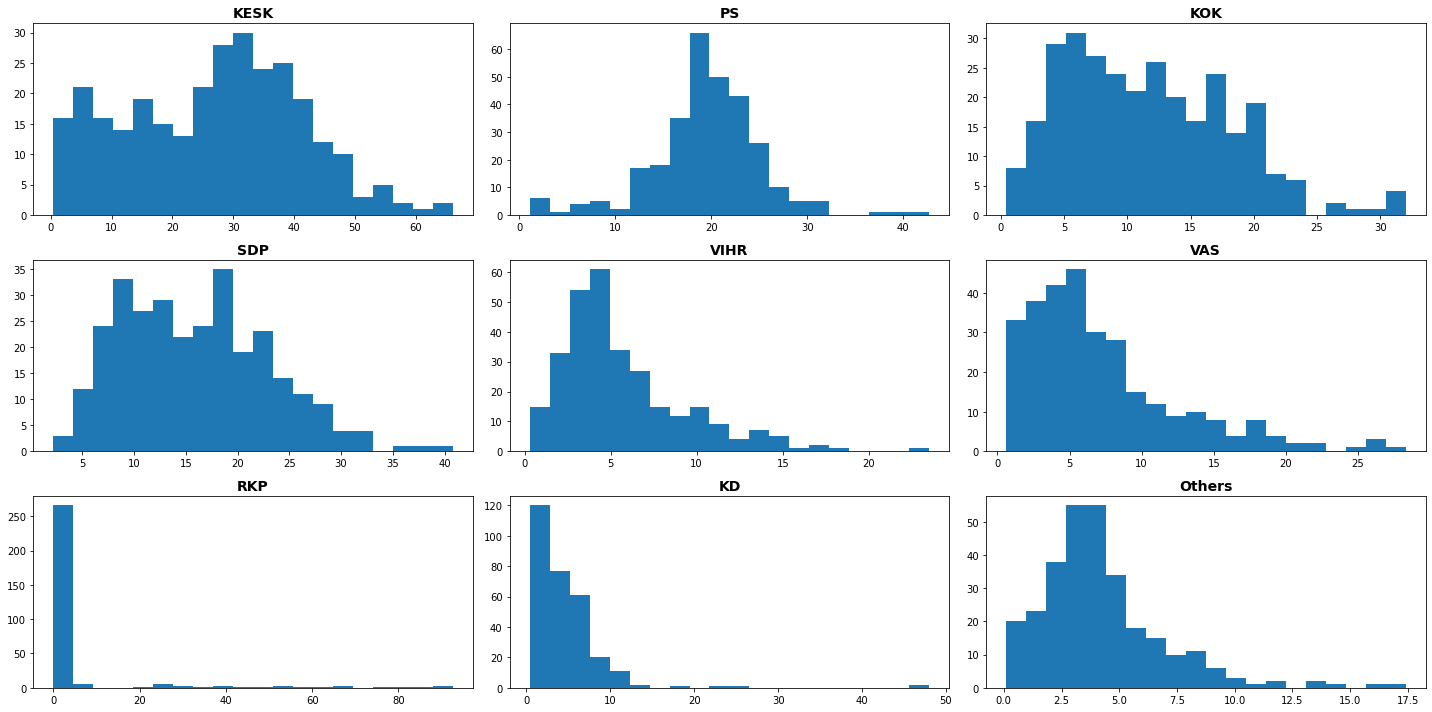

In [59]:

# Creating a new figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# Looping through each party
for idx, party in enumerate(parties):
    ax = axes[idx // 3, idx % 3]
    ax.hist(votes_proportion[f'{party}-Proportion of votes cast'], bins=20)
    ax.set_title(party, fontsize=14, fontweight='bold')

    ax.grid(False)  # Turn off gridlines

plt.tight_layout()
plt.savefig('histogram2.png', dpi=400)
plt.show()


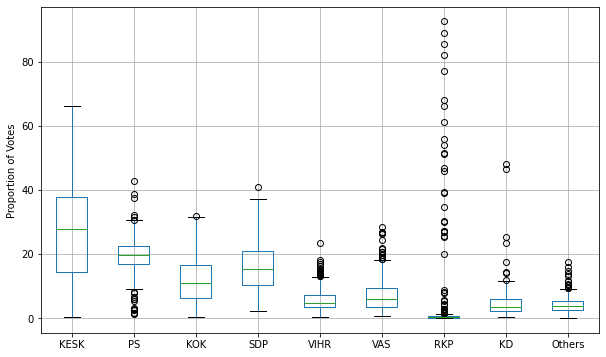

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
votes_proportion.boxplot(ax=ax)
ax.set_xticklabels(parties)
ax.set_ylabel('Proportion of Votes')
plt.savefig('histogram2.png', dpi=400)
plt.show()

In [60]:
outliers = {}
for party in parties:
    q1 = summary_statistics.loc['25%', f'{party}-Proportion of votes cast']
    q3 = summary_statistics.loc['75%', f'{party}-Proportion of votes cast']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[party] = merged_data_imputed[(merged_data_imputed[f'{party}-Proportion of votes cast'] < lower_bound) | (merged_data_imputed[f'{party}-Proportion of votes cast'] > upper_bound)][['Municipality', f'{party}-Proportion of votes cast']]

for party, outlier_data in outliers.items():
    print(f'Outliers for {party}:')
    print(outlier_data)

Outliers for KESK:
Empty DataFrame
Columns: [Municipality, KESK-Proportion of votes cast]
Index: []
Outliers for PS:
    Municipality  PS-Proportion of votes cast
4         Alavus                         31.6
37     Honkajoki                         42.7
52          Ingå                          8.1
74    Kankaanpää                         38.8
80        Karvia                         37.5
84    Kauniainen                          6.4
90      Kimitoön                          5.9
106      Korsnäs                          1.1
111      Kronoby                          5.4
149       Larsmo                          1.6
151        Malax                          2.4
162     Korsholm                          7.8
176       Närpes                          1.6
189    Pedersöre                          2.4
201     Pomarkku                         30.7
219    Raasepori                          5.8
246    Siikainen                         32.3
286    Nykarleby                          2.7
305      

In [61]:
# Create a dictionary of shorter names for the columns
shorter_names = {
    'Degree of urbanisation, %': 'Urbanisation',
    'Population': 'Population',
    'Share of foreign citizens of the population, %': 'Foreign Citizens',
    'Share of household-dwelling units living in terraced houses and detached houses, %': 'Terraced & Detached Houses',
    'Share of household-dwelling units living in rental dwellings, %': 'Rental Dwellings',
    'Employment rate, %': 'Employment Rate',
    'Proportion of the unemployed among the labour force, %': 'Unemployment Rate',
    'Workplace self-sufficiency': 'Workplace Self-sufficiency',
    'KESK-Proportion of votes cast': 'KESK',
    'PS-Proportion of votes cast': 'PS',
    'KOK-Proportion of votes cast': 'KOK',
    'SDP-Proportion of votes cast': 'SDP',
    'VIHR-Proportion of votes cast': 'VIHR',
    'VAS-Proportion of votes cast': 'VAS',
    'RKP-Proportion of votes cast': 'RKP',
    'KD-Proportion of votes cast': 'KD',
    'Others-Proportion of votes cast': 'Others',
}

# Rename the columns in the DataFrame
merged_data_imputed.rename(columns=shorter_names, inplace=True)


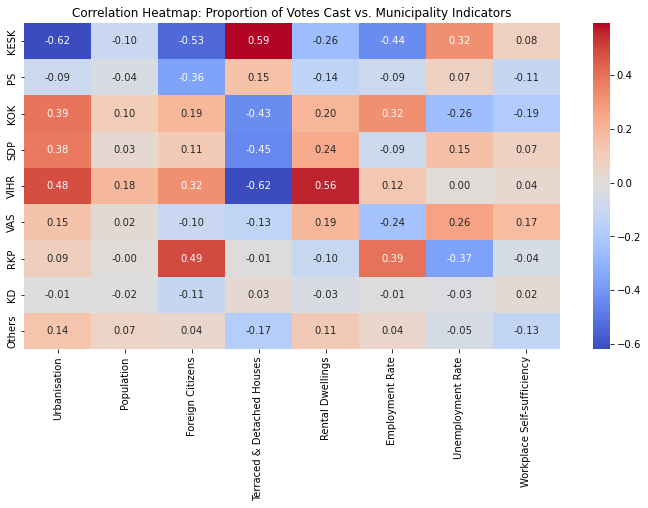

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between the proportion of votes cast for each party and the municipality indicators
correlation_matrix = merged_data_imputed.corr().iloc[8:, :8]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Proportion of Votes Cast vs. Municipality Indicators')
plt.savefig('corr.png', dpi=400)
plt.show()


In [65]:
print(correlation_matrix)

        Urbanisation  Population  Foreign Citizens  \
KESK       -0.615734   -0.100621         -0.534848   
PS         -0.091906   -0.038331         -0.358752   
KOK         0.389098    0.096027          0.194780   
SDP         0.376727    0.029462          0.113360   
VIHR        0.481673    0.182143          0.321209   
VAS         0.145660    0.019394         -0.101710   
RKP         0.090676   -0.001823          0.491968   
KD         -0.013826   -0.016365         -0.114708   
Others      0.141581    0.066082          0.041124   

        Terraced & Detached Houses  Rental Dwellings  Employment Rate  \
KESK                      0.592460         -0.261192        -0.435078   
PS                        0.150895         -0.139273        -0.089106   
KOK                      -0.434300          0.199315         0.322390   
SDP                      -0.450365          0.236293        -0.086801   
VIHR                     -0.618587          0.556424         0.124020   
VAS                  

In [68]:
top_correlations = {
    'KESK': ['Urbanisation', 'Terraced & Detached Houses', 'Employment Rate'],
    'PS': ['Foreign Citizens', 'Unemployment Rate', 'Workplace Self-sufficiency'],
    'KOK': ['Urbanisation', 'Terraced & Detached Houses', 'Employment Rate'],
    'SDP': ['Urbanisation', 'Terraced & Detached Houses', 'Unemployment Rate'],
    'VIHR': ['Urbanisation', 'Population', 'Foreign Citizens'],
    'VAS': ['Rental Dwellings', 'Unemployment Rate', 'Workplace Self-sufficiency'],
    'RKP': ['Urbanisation', 'Foreign Citizens', 'Employment Rate'],
    'KD': ['Foreign Citizens', 'Terraced & Detached Houses', 'Workplace Self-sufficiency'],
    'Others': ['Urbanisation', 'Population', 'Rental Dwellings']
}


In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

for party, indicators in top_correlations.items():
    # Perform multivariate linear regression
    X = merged_data_imputed[indicators]
    y = merged_data_imputed[f'{party}']

    X = sm.add_constant(X)  # Add a constant term to the predictors
    model = sm.OLS(y, X).fit()

    print(f'\n{party} Regression Results:')
    print(model.summary())

    # Check for multicollinearity
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print('\nVariance Inflation Factors:')
    print(pd.Series(vif, index=X.columns))


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for party, indicators in top_correlations.items():
    # Perform multivariate linear regression
    X = merged_data_imputed[indicators]
    y = merged_data_imputed[f'{party}']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Fit the model on the training set
    model = LinearRegression().fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate validation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{party} Out-of-Sample Validation Results:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R-squared: {r2:.4f}')



KESK Out-of-Sample Validation Results:
Mean Squared Error: 92.3308
Mean Absolute Error: 7.3181
R-squared: 0.5919

PS Out-of-Sample Validation Results:
Mean Squared Error: 26.8937
Mean Absolute Error: 3.7709
R-squared: 0.1648

KOK Out-of-Sample Validation Results:
Mean Squared Error: 26.8877
Mean Absolute Error: 3.9314
R-squared: 0.3173

SDP Out-of-Sample Validation Results:
Mean Squared Error: 40.6431
Mean Absolute Error: 5.1129
R-squared: 0.1868

VIHR Out-of-Sample Validation Results:
Mean Squared Error: 12.4179
Mean Absolute Error: 2.4842
R-squared: 0.1062

VAS Out-of-Sample Validation Results:
Mean Squared Error: 20.4818
Mean Absolute Error: 3.8072
R-squared: 0.1303

RKP Out-of-Sample Validation Results:
Mean Squared Error: 165.7865
Mean Absolute Error: 6.7654
R-squared: 0.4490

KD Out-of-Sample Validation Results:
Mean Squared Error: 14.0256
Mean Absolute Error: 2.5952
R-squared: -0.0190

Others Out-of-Sample Validation Results:
Mean Squared Error: 7.8139
Mean Absolute Error: 1.91

In [41]:
# Group the parties by their political ideologies
merged_data_imputed['Left-leaning'] = merged_data_imputed['VAS'] + merged_data_imputed['VIHR'] + merged_data_imputed['SDP']
merged_data_imputed['Right-leaning'] = merged_data_imputed['KOK'] + merged_data_imputed['PS'] + merged_data_imputed['KD']
merged_data_imputed['Centrist'] = merged_data_imputed['KESK'] + merged_data_imputed['RKP']

# Independent variables
independent_vars = ['Urbanisation', 'Population', 'Foreign Citizens',
       'Terraced & Detached Houses', 'Rental Dwellings', 'Employment Rate',
       'Unemployment Rate', 'Workplace Self-sufficiency']

# Create a function to perform the regression analysis
def perform_regression(dependent_var):
    X = merged_data_imputed[independent_vars]
    X = sm.add_constant(X)  # Add a constant term to the regression model
    y = merged_data_imputed[dependent_var]

    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Check for multicollinearity
    vif_data = pd.DataFrame()
    vif_data['Independent Variables'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)

# Perform regression analysis for each group
print("\nLeft-leaning Parties:")
perform_regression('Left-leaning')

print("\nRight-leaning Parties:")
perform_regression('Right-leaning')

print("\nCentrist Parties:")
perform_regression('Centrist')



Left-leaning Parties:
                            OLS Regression Results                            
Dep. Variable:           Left-leaning   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     34.43
Date:                Thu, 04 May 2023   Prob (F-statistic):           7.28e-38
Time:                        00:08:16   Log-Likelihood:                -1003.2
No. Observations:                 296   AIC:                             2024.
Df Residuals:                     287   BIC:                             2058.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Create a function to perform the regression analysis and out-of-sample validation
def perform_regression_and_validation(dependent_var):
    X = merged_data_imputed[independent_vars]
    y = merged_data_imputed[dependent_var]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model using the training set
    X_train = sm.add_constant(X_train)  # Add a constant term to the regression model
    model = sm.OLS(y_train, X_train).fit()
    print(model.summary())

    # Check for multicollinearity
    vif_data = pd.DataFrame()
    vif_data['Independent Variables'] = X_train.columns
    vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    print(vif_data)

    # Out-of-sample validation
    X_test = sm.add_constant(X_test)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nOut-of-Sample Validation Results for {dependent_var}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

# Perform regression analysis and validation for each group
print("\nLeft-leaning Parties:")
perform_regression_and_validation('Left-leaning')

print("\nRight-leaning Parties:")
perform_regression_and_validation('Right-leaning')

print("\nCentrist Parties:")
perform_regression_and_validation('Centrist')



Left-leaning Parties:
                            OLS Regression Results                            
Dep. Variable:           Left-leaning   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     27.92
Date:                Thu, 04 May 2023   Prob (F-statistic):           5.46e-30
Time:                        00:50:47   Log-Likelihood:                -798.80
No. Observations:                 236   AIC:                             1616.
Df Residuals:                     227   BIC:                             1647.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------